In [2]:
# Importamos librerias  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Datos de entrenamiento
X_train = pd.read_csv('../Corpus/undersampling_data/X_undersampled_genero.csv', index_col=0)
y_train = pd.read_csv('../Corpus/undersampling_data/y_undersampled_genero.csv', index_col=0)
print(X_train.shape)
print(y_train.shape)

(96752, 96)
(96752, 1)


<Axes: xlabel='C1', ylabel='C2'>

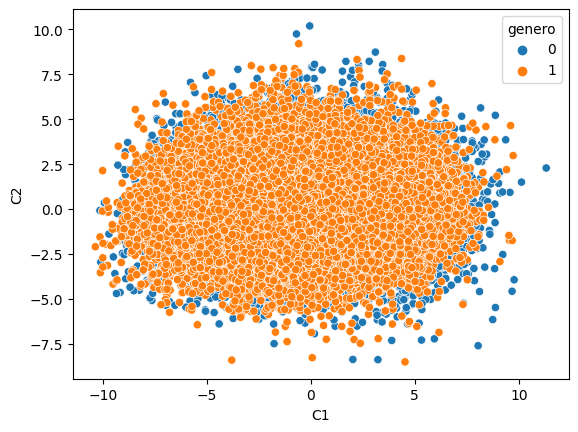

In [4]:
from sklearn.decomposition import PCA

pca_c2 = PCA(n_components=2)
x_train_transformed_pca_c2 = pd.DataFrame(pca_c2.fit_transform(X_train), columns=["C1","C2"])
y = pd.DataFrame(y_train)

data = pd.concat([x_train_transformed_pca_c2,y ], axis=1)
sns.scatterplot(data=data, x="C1", y="C2", hue="genero")

In [11]:
data.to_csv('../Corpus/pca_data/PCA2_genero.csv')
X_test = pd.read_csv('../Corpus/splited_data/X_test.csv',index_col=0)
pca_x_test = pca_c2.transform(X_test)

pca_x_test_df = pd.DataFrame(pca_x_test, columns=["C1","C2"])
pca_x_test_df.to_csv('../Corpus/pca_data/PCA2_x_test_genero.csv')

(48376, 3)


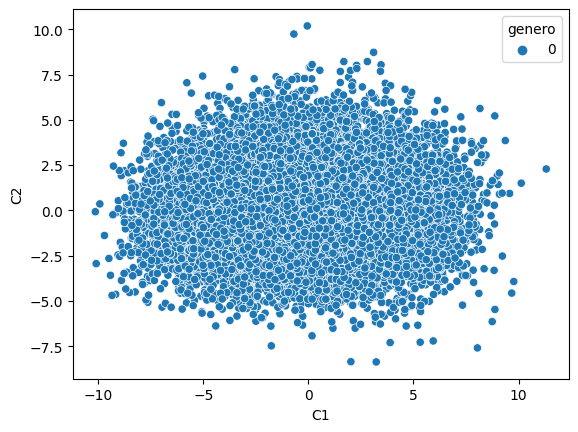

In [7]:
# Extraer las filas donde la columna "clase" sea igual a 0
femenino = data[data['genero'] == 0]
sns.scatterplot(data=femenino, x="C1", y="C2", hue="genero")
print(femenino.shape)

(48376, 3)


<Axes: xlabel='C1', ylabel='C2'>

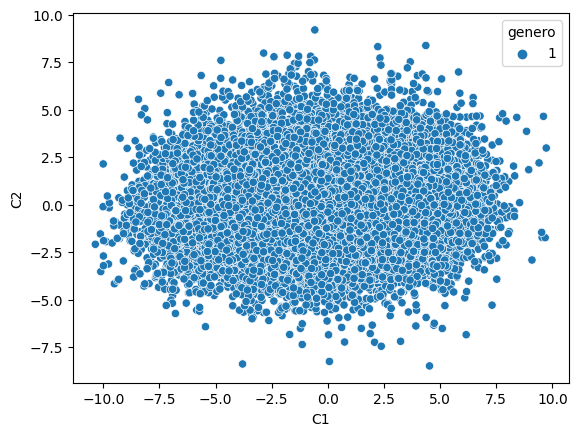

In [8]:
masculino = data[data['genero'] == 1]
print(masculino.shape)
sns.scatterplot(data=masculino, x="C1", y="C2", hue="genero")

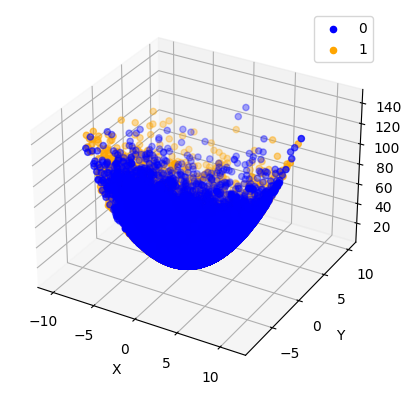

In [9]:
C3 = []
for coord in data.values:
    C3.append((coord[0]**2 + coord[1]**2)+10)

data['C3'] = C3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = data['genero'].unique()
colors = ['blue','orange']  # Puedes personalizar los colores para cada clase si lo deseas

for clase, color in zip(classes, colors):
    subset =data[data['genero'] == clase]
    ax.scatter(subset['C1'], subset['C2'], subset['C3'], c=color, label=clase)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

In [10]:
pca = PCA(n_components=3)
x_train_transformed = pd.DataFrame(pca.fit_transform(X_train), columns=["C1","C2","C3"])
print(x_train_transformed.shape)
data = pd.concat([x_train_transformed, y_train], axis=1)
data

(96752, 3)


,C1,C2,C3,genero
0,1.510903,-0.921766,0.398562,0
1,-2.234348,-1.292067,-0.818943,0
2,0.327877,-2.384690,0.908074,0
3,3.107008,0.148692,1.909476,0
4,-2.178198,2.297632,1.603868,0
...,...,...,...,...
96747,-2.711689,-1.556544,0.416292,1
96748,-0.839146,2.693599,-2.759822,1
96749,-3.239317,-0.288576,-0.619499,1
96750,1.483266,-1.082880,0.397830,1


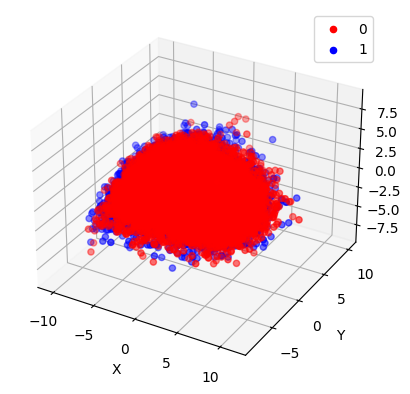

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = data['genero'].unique()
colors = ['red', 'blue','orange']  # Puedes personalizar los colores para cada clase si lo deseas

for clase, color in zip(classes, colors):
    subset =data[data['genero'] == clase]
    ax.scatter(subset['C1'], subset['C2'], subset['C3'], c=color, label=clase)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
#sns.scatterplot(data=data, x="C1", y="C2", hue="genero")